## Single-Layer Networks

We have covered some of the limitations of single layer neural networks in class, but they are still powerful learning systems that provide a good way to begin learning about how to build neural networks using the `Keras` and `TensorFlow` tools. These tools used to be separate frameworks, but the `Keras` API has now been merged into `TensorFlow` and we will be using this merged API for our work here.

So, let's see how we can load some data vectors in from a file, and learn something using a single-layer network!

We will start with a data set for classifying different species of iris plants based on size measurements taken from their flowers. The original data set can be found in the University of California, Irvine Machine Learning Reposity, which is linked to on the course website, but I've modified it just slightly for our purposes in this course.

First things first, let's grab the data to start working with it. For this, we need `pandas` and a URL for loading the data...

You can copy the URL for the data from [here](https://www.cs.mtsu.edu/~jphillips/courses/CSCI4850-5850/public/iris-data.txt)

In [1]:
# Load pandas
import pandas

# Load numpy too... we'll need it soon.
import numpy as np

In [2]:
# Load the Iris data set
# Note the header=None option...
data = np.array(pandas.read_table(
    "https://www.cs.mtsu.edu/~jphillips/courses/CSCI4850-5850/public/iris-data.txt",
    delim_whitespace=True,
    header=None))

Pandas will return a special data structure that is capable of handling tables of mixed data types (strings, integers, floating point, etc.). However, the data set we just loaded contains only numeric information (integers and floating point), making it reasonable for conversion into a numpy array. If we had a data set with mixed data types, we would need to work with the `pandas` data structure more closely to convert the non-numeric parts into vector-based encodings. The  vector encodings could then be used to provide this information to a neural network. We will revisit data encoding strategies at a later time, but for now we will stick to numeric data.

Let's take a quick look at the **shape** of this data:

In [3]:
# Shape information
print(data.shape)

(150, 5)


Typically, data sets will be arranged with one row per example. So for this data, we can assume there are 150 examples here (each is a set of measurements from a particular iris flower). Let's take a _slice_ of the data to see what it looks like:

In [4]:
# Slice just the first 3 examples
data[0:3,:]

array([[5.8, 2.7, 3.9, 1.2, 1. ],
       [6.9, 3.1, 5.4, 2.1, 2. ],
       [7.7, 3. , 6.1, 2.3, 2. ]])

You can notice here that we can use the `:` operator (`0:3`) to specify a list of rows that we would like to extract from the matrix. We can also specify the number of columns using a similar construct, but here we would like to look at **all** columns for these three rows. We just use the `:` operator alone to perform this operation. Any selection of items performed in this way is called a _slice_, and is useful for exploring large data sets or forming new arrays from subsets of other arrays.

For this data set, each example consists of a vector of _four_ features, and a _class label_ (five items total). Each of the four feature values are _continuous_ and the class labels are _discrete_. We can explore the data a little using the `unique()` function from numpy.

In [5]:
# Let's look at the last column only...
# .. and find the discrete set of items
# that it contains...
np.unique(data[:,4])

array([0., 1., 2.])

In [6]:
# Let's look at the other columns, too.
# First, the minimum and next the maximum...
print(np.min(data[:,0:4],axis=0))
print(np.max(data[:,0:4],axis=0))

[4.3 2.  1.  0.1]
[7.9 4.4 6.9 2.5]


The `unique()` function allows you to see the range of discrete values in an array. The 5th column of the data set contains only 0, 1, or 2. These are the _class labels_ for the examples. From a practical standpoint, these are the three different species of iris that we are wanting to classify. If you are interested in **exactly** which species the 0, 1, and 2 represent, please take a look at the details about the data set on the UCI repository page - [Link](http://archive.ics.uci.edu/ml/datasets/Iris). Understanding what the class labels correspond to in the real world might be important for understanding what our network is trying to tell us, but a proper vector encoding of the class labels alone is sufficient for training a neural network.

The `min()` and `max()` functions allow us to explore the ranges of the four different measurements obtained from each flower. Each represents a measurement in centimeters for: sepal length, sepal width, petal length, and petal width. Again, this mapping becomes abstracted away since the neural network experiences each flower as a vector of measurements.

At this time for simplicity, we will stick to the length-4 vector encoding of each flower. That is, the **training data** for the network that we will be building will just be all 150 vectors, each of length 4. We will store these **input vectors** in the matrix, $\boldsymbol{X}$:  

In [7]:
# Input training vectors
X = data[:,0:4]
X.shape

(150, 4)

$\boldsymbol{X}$ now contains all of the features for the 150 flowers we are going to try to classify using our neural network.

For the class labels, we will construct a set of **target vectors** that represent the human-labeled class assignments for the flowers. While we _could_ just let the network attempt to assign a 0, 1, or 2, there is a more useful approach to take. This approach motivated by the idea of what kind of output a network should produce for a classification problem. In our case, if we left the class label vector as-is, the *target* vector for each flower would be a 1-dimensional vector (i.e. a single scalar value). Since we construct our network input and output _layers_ to have the same number of units as our input and target vectors, respectively, we would only use a single output unit. This _output unit_ would need to have an activation function capable of representing the possible target values (0,1,2) which limits our choices. However, with a different **encoding** of the target vectors, this will no longer be an issue, and we will get some other benefits along the way.

Let's look at this method for transforming the class labels in detail:

In [8]:
## First, let's grab the class labels by themselves...
labels = data[:,4]

Now that we have the labels "in-hand" we will use some tools from the `keras` package (which relies on the `tensorflow` package) to create the encoding we would like to use. We will first load the tools, then create the set of target vectors, $\boldsymbol{Y}$, which we will be using for training our classifier:

In [9]:
# Keras/Tensorflow
import tensorflow.keras as keras

In [10]:
# Convert the integer class labels to a
# categorical or "one-hot" encoding...
Y = keras.utils.to_categorical(labels,
                               len(np.unique(labels)))

# Encoded vector size?
print(Y.shape)

(150, 3)


In this operation, the integer class labels have been encoded into a 3-dimensional vector space. The `unique()` function was used to determine the number of unique integer labels in the vector, and the vector itself gets passed to the `to_categorical()` function to produce this encoding.

In [11]:
# Some particular examples...
print(labels[4])
print(Y[4,:])

print(labels[8])
print(Y[8,:])

print(labels[1])
print(Y[1,:])

0.0
[1. 0. 0.]
1.0
[0. 1. 0.]
2.0
[0. 0. 1.]


Above, I have pulled three examples to illustrate how the encoding scheme works. The `0` class label has now been mapped to the vector $[1,0,0]$, the label `1` has now been mapped to the vector $[0,1,0]$, and the label `2` has been mapped to the vector $[0,0,1]$. This is known as a categorical (or _one-hot_) encoding, and is a common way to represent discrete (i.e. integer) information to a neural network. In fact, it can sometimes be useful to perform a similary mapping for integer data that is provided as _input_ to a network as well, but we will save that for another day.

More importantly, since we now have vectors consisting only of scalar values in the range $[0,1]$, all typical activation functions that we have studied so far could be used since they can all produce output values in that same range (well, technically the acceptable range would be $(0,1)$ for the sigmoid function, for example, but that's often close enough in practice).

Now that we have a set of **input patterns**, $\boldsymbol{X}$, and a set of **target patterns**, $\boldsymbol{Y}$, we can use these vectors for training a neural network.

## Building a Single-Layer Network

Now that we have data ready for training, we just need to construct a network to learn how to to classify irises. The `keras` package provides the tools needed to set up such networks very quickly and start training them.

We will start by setting up a data structure that will contain our network, known as the _model_:

In [12]:
## Setting up a single-layer network
model = keras.Sequential()

We are using the `Sequential()` model which makes the assumtion that we would like to build a _feed-forward_ neural network architecture, which is what we have been focusing on so far in class.

Now that we have the container, let's create a single layer network. We do this by adding it to the model using the `add()` member function. However, we also need to specify the kind of layer we want to add, and _some_ of its details. For our purposes, we are interested in adding a single layer (really, the _output layer_). Remember, the input layer is rather simple in that it doesn't perform computation, and instead just holds input pattern data during training and prediction (passing data through the network). So, we just need to tell this _output layer_ that it will receive data from the input layer of a certain size. We also need to create all of the connection weights between the input and output layer units, but this is all taken care of for us by the `Dense()` function.

In a nutshell, when making a layer using the `Sequential()` model, all weights leading _into_ that layer will also need to be specified. There are different ways of connecting layers together, but for now we will mainly focus on densely connected networks, where all units in the previous layer will be connected to all units in the layer we are creating. Again, the `Dense()` function provides all of the functionality that we need for this operation:

In [13]:
# Add a densely connected layer of units
# and specify the input layer size (note,
# the input layer is assumed to be there,
# which makes this a single-layer network!)

# Input size - 4
input_size = X.shape[1]

# Output size - 3
output_size = Y.shape[1]

# We are using a sigmoid activation
# function, AND the input_size was
# provided within a python list []...
model.add(keras.layers.Dense(output_size,
                             activation='sigmoid',
                             input_shape=[input_size]))

A lovely new neural network!

You can use the `summary()` function to get glimpse into what the Keras tools have created for us:

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


This network follows the conventions we have utilized in class for neural units. That is the neural units, weight matrices, and bias weights have all been created for us using the `keras` tools.

For example, we have a 4x3 weight matrix (12 connection weights), and three output units each with a bias weight, $w_{o}$, (3 bias weights total). Hence, we have 15 total weights that can be changed during the learning process, and these are known as _trainable parameters_ in the `keras` framework.

The output units utilize the weighted sum calculation we have discussed in class (net input) and we have also specified a _sigmoid_ activation function for output.

You can find some additional details about the network's structure by generating and image to display in your notebook:

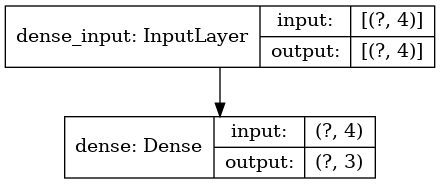

In [15]:
keras.utils.plot_model(model,to_file='single_layer_network.png',
                       show_shapes=True,expand_nested=True)

You can see that some additional information (like details about the *input layer*) are provided by this format. You can also see how the layers are connected together (directional arrows), their layer types (eg. Dense), and their input/output shapes.

There are two things to keep in mind at this point, and the diagram above illustrates these concepts:

1. The input shape for the Dense layer is `(?,4)` and the output shape for the Dense layer is `(?,3)`. First of all, each of these shapes indicate that they each are a **2 dimensional** tensor (also known as a matrix). Second, the `?` is a flexible placeholder for the length of the first dimension of the tensor. The reason for this is because this network is built to accept patterns of length 4, but the network cannot know how many patterns it will be dealing with at any particular moment in time. Remember, we can utilize parallel processing in many ways in neural networks, and one way is to simply have the network process multiple inputs vectors/patterns at the same time (weights are held constant while this entire groups of vectors is propagated through the model). **If** we wanted to have it operate on a **single pattern**, we could provide it with an input tensor of shape `(1,4)` (one pattern on each row, only one row). However, we could pass *more patterns* into the network at the same time by just **adding additional rows of input patterns** to the tensor. The `?` for all layers is replaced by the number of patterns (the length of the first dimension in the tensor). So, the output from the network would correspondingly be a `(1,3)` tensor (one pattern produces an output activation vector of length 3 - remember, we have 3 iris species).

2. The weights for the Dense layer are stored internally inside of the Dense layer itself, so the arrow is just showing how the output tensor from the Input layer will be copied/sent downstream to the Dense layer. The Dense layer's input shape is of the corresponding shape to receive it, which is a requirement for a properly structured network. However, the fact that the Dense layer has an input shape of `(?,4)`, and an output shape of `(?,3)` means it will contain a typical dense layer weight matrix of shape 4x3 and 3 bias weights (for computing net inputs, see above), and then perform a rate encoding using the chose activation function (sigmoid - but note that this is *not shown* in the diagram).

However, the model isn't quite ready to go. At this point, `model` contains only a **template** for what we want the network to be. We need to `compile()` the network to create the tensorflow data structures that _actually_ compute the neural network. Let's do that now:

In [16]:
# Prep the model for -learning-
model.compile(loss=keras.losses.mse,
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=['accuracy'])

Remember, learning requires some method for specifying how to update the weights via experience with the training data.

We will use the _stochastic gradient descent_ to perform this operation, and we select this by setting `optimizer = keras.optimizers.SGD(lr=0.01)` (note, the learning rate, `lr`, setting). However, we need to select an _error function_ as well that we would like to minimize for the optimizer to know what to optimize.

In the current literature, since not all functions for describing goodness are really metrics for measuring _error_, the more general term, _loss_, is often used. We will be using a _loss_ function that is very similar to the SSE function we studied in class, but here it's the Mean-Squared-Error (`loss=keras.losses.mse`). Overall, you can think about this as being similar to multiplying the SSE by some fraction (like we did to derive the delta rule) based on the number of training examples used in each batch for calculating the weight update.

While we will use loss to optimize the weights in the network, a more intuitive metric of performance is added to the model as well: _accuracy_. While accuracy isn't something used for optimization, if we assume that the strongest ouput from the network (whichever of the three output units produces the highest value) is the network's _best guess_ at what the current iris example should be, then we can calculate the fraction of the iris patterns that it is classifying correctly. Thus, 0.0 accuracy would indicate that the network is classifying **none** of the examples properly, but 1.0 accuracy would indicate that the network is classifying **all** of the examples properly.

One final important note: this neural network uses a *sigmoid* activation function for it's output layer and MSE is known to **not** be the best choice of loss function for output layers of this type. MSE is more commonly used with a linear activation function which maps to continuous outputs (regression problems instead of classification problems). However, since MSE keeps the delta-rule calculations below very simple, we have opted to use it here. In future lectures, we will discuss how to use a more principled approach to pairing output layer activation functions with loss functions since this can greatly improve a network's learning behavior.

There are other things that the `compile()` function takes care of for us, such as setting the weights to some reasonable starting values. For now, we will trust the `compile()` function to do this job. However, we can always catch a glimpse of what the current weight values are in the network if needed:

In [17]:
# Examine the bias and connection weights...
model.get_weights()

[array([[ 0.09391999, -0.40792686,  0.35855067],
        [ 0.5989735 ,  0.703128  ,  0.5537844 ],
        [-0.23786509,  0.6430185 ,  0.728176  ],
        [ 0.6450845 ,  0.71855295,  0.31226158]], dtype=float32),
 array([0., 0., 0.], dtype=float32)]

A python list is returned: the first element contains the 4x3 weight matrix, and the second element contains the 3-element vector of output unit bias weights. You can see that the connection weights are initialized to _small_ random values, and the bias weights are initially set to zero. We will explore other methods for initializing the weights in later assignments.

## How does it work?

Before we move on, let's quickly explore how `keras` calculates values for the network. In other words, let's perform the forward-pass process of the neural network from _scratch_ using `numpy`. This way, we can see that `keras` is actually calculating the expressions for single-layer networks just like how we explored them in class.

First, keep in mind that the weights above are incorrect (they are random initial values), and will be changed during _training_ below. However, we can still see what the _current_ predictions of the network will be. That is, given some input patterns, $\boldsymbol{X}$, what would the network output for those examples? The `predict()` function will allow `keras` to do this work, and we will choose to perform this operation for the first _five_ patterns in the network. After that, we will explore applying the forward-pass equations by computing them outselves using the same weights above to see how `keras` computes a forward-pass in just the same was as we have discussed in lecture.

So, let's call the `predict()` function using the first five training patterns. In then end, this function will give us the final activations for the _output layer_ neurons. Since we have a one-hot encoding strategy with three values for our targets, $\boldsymbol{Y}$, we also asked `keras` to build the output layer using an equivalent number of neurons. Therefore, if we provide 5 training patterns as input, we will expect the `predict()` function to return a 5x3 matrix where each row contains the output activations for one of the five patterns. It is easy to process more than one pattern using this function due to the nature of linear algebra operations as we will see below when we compute the __same__ activations from scratch using `numpy` to implement the forward-pass equations.

One final note... since the weights are randomly initialized, we will get essentially useless outputs at this time since the network must first be trained (and the weights modified) to perform better at producing the desired function. However, once the network _has_ been fully trained, then these weights will produce an excellent predictions on the Iris task. Thus, `predict()` is more typically used _after_ training instead of _before_. Yet, all that the `predict()` function really does is perform a forward-pass through the network with the provided data, and the outputs are assumed to be the _current_ predictions of the network whether trained or untrained. Therefore, mimicking this process using `numpy` is a good way to see what the function is actually doing...

OK, enough talk, let's get to it:

In [18]:
model.predict(X[0:5,:])

array([[0.88167536, 0.9479702 , 0.9988756 ],
       [0.9292399 , 0.9872105 , 0.999846  ],
       [0.92776287, 0.98947513, 0.9999311 ],
       [0.89161384, 0.9660111 , 0.99920636],
       [0.93063146, 0.85484225, 0.99390864]], dtype=float32)

These are the predicted outputs for these first five input patterns using the model we built above. Now we will utilize the weights directly via `numpy` to perform the -same- forward pass operation from _scratch_ to see how the forward-pass is accomplished.

For this, we take the matrix of weights connecting the input layer to the ouput layer and perform a matrix multiplication operation using the `dot()` function and then add the bias weights for each of the output units in as well. We are therefore performing the weighted-sum for each of the output units _at the same time_ using these tools from linear algebra.

After we perform the net input calculations, we will apply the logistic sigmoid activation function to produce the _same_ outputs as `keras` above. Let's try it...

In [19]:
## Net Inputs - from scratch\
## Weighted-sums + bias
output_layer_neti = np.dot(np.float32(X[0:5,:]),
                           model.get_weights()[0])+model.get_weights()[1]
output_layer_neti

array([[2.008392 , 2.9025056, 6.789412 ],
       [2.5750718, 4.3462625, 8.778631 ],
       [2.5528216, 4.5434318, 9.582269 ],
       [2.1073325, 3.3471422, 7.138145 ],
       [2.59643  , 1.7730956, 5.0947795]], dtype=float32)

Make sure to keep in mind that `get_weights()` returned a python list with both a weight matrix (input units, 4, to output units, 3, so 4x3 for all $w_{ij}$) and a vector (output units, 3, so a vector of length 3 for the bias weights or each $w_{0}$). This means that `get_weights()[0]` was obtaining the weight matrix, and `get_weights()[1]` was obtainining the bias weights, respectively.

In [20]:
## Ouput Layer Activations - from scratch
## Logistic Sigmoid
1.0 / (1.0 + np.exp(-1.0 * output_layer_neti))

array([[0.8816754 , 0.94797015, 0.9988757 ],
       [0.92923987, 0.9872105 , 0.999846  ],
       [0.92776287, 0.98947513, 0.9999311 ],
       [0.89161384, 0.96601117, 0.9992065 ],
       [0.93063146, 0.85484225, 0.99390864]], dtype=float32)

Note how the outputs produced by this operation are an **exact** match to those above, so we can see that `keras` is clearly implementing the same kind of neural networks explored so far in lecture.

We will now move on to training up the network in order to change the weights using the Delta-rule.

## Delta-rule learning from scratch

Now that we have seen how to perform a forward-pass or _prediction_ using the neural network from scratch, let's perform a _learning_ step in the same manner. Above, we first used `keras` to perform the prediction and then used `numpy` to validate the learning equations. We will do something similar here, but in the opposite order. First, we will start by performing the prediction or forward-pass and then the corresponding backward-pass (Delta-rule learning step) from scratch. We will utilize a single training vector from $\boldsymbol{X}$ and it's corresponding target vector from $\boldsymbol{Y}$. The target vector will be used to calculate the _error_ of the prediction and the gradient of the error with respect to each weight (and bias weight) will be calculated, producing the updated weight matrix _from scratch_ using `numpy`. Second, we will perform a single learning step using `keras` and see if the weights updates to the model are the same as those that we performed from scratch.

To begin, let's first store a copy of the weights from the model _as they currently are_. We will compute weights updates later, and then apply change to this _copy_ to simplify the code a little bit.

In [21]:
## The weight matrix (from input layer to output layer)
weights = model.get_weights()[0]
## The bias weight vector (output layer)
bias_weights = model.get_weights()[1]
print(weights)
print(bias_weights)

[[ 0.09391999 -0.40792686  0.35855067]
 [ 0.5989735   0.703128    0.5537844 ]
 [-0.23786509  0.6430185   0.728176  ]
 [ 0.6450845   0.71855295  0.31226158]]
[0. 0. 0.]


Now, we can perform a forward-pass just like before to produce a prediction...

In [22]:
output_neti = np.dot(np.float32(X[0:1]),weights)+bias_weights
output_neti

array([[2.0083919, 2.9025054, 6.789412 ]], dtype=float32)

In [23]:
output_acts = 1.0 / (1.0 + np.exp(-output_neti))
output_acts

array([[0.8816753 , 0.94797015, 0.9988757 ]], dtype=float32)

Again, we can verify that we have calculated the equations from class and that they match the way that `keras` performs these operations... 

In [24]:
model.predict(X[0:1])

array([[0.88167536, 0.94797015, 0.9988756 ]], dtype=float32)

Now, we are ready to test our prediction and update the weights to _improve_ that prediction in the future. First, we will calculate the _error_ or difference between the output predictions that the network is currently producing and the _target_ vector that it _should_ (or that we want it to) produce. This vector is just the first row in the target matrix, $\boldsymbol{Y}$.

In [25]:
error = output_acts - np.float32(Y[0:1])
error

array([[ 0.8816753 , -0.05202985,  0.9988757 ]], dtype=float32)

According to the derivation for mean-squared-error, MSE (which is a little different from the sum-squared-error, SSE, function we explored in lecture), we don't first multiply the error by 1/2 to keep the math a little more succinct. Therefore, in the final updates, the derivative is multiplied by 2. Still, the rest of the derivative with respect to the net inputs of the output units is just the _derivative_ of the sigmoid activation function at those net input values that we calculated above.

In [26]:
deriv = 2.0 * np.exp(-output_neti) / np.power(1.0+np.exp(-output_neti),2.0)
deriv

array([[0.20864782, 0.09864549, 0.0022462 ]], dtype=float32)

We are ready to calculate our $\delta$ values for the output units, but again MSE is a little different from SSE in that we also need to divide by the number of output units since we are minimizing the _mean_ of the squared errors. These $\delta$ terms will be used update both the connection weights and bias weights appropriately.

In [27]:
## For mean-squared-error loss, the math indicates
## to normalize by 1/N where N is the number of
## output units across which we are obtaining 
deltas = error*deriv*(1.0/len(bias_weights))
deltas

array([[ 0.06131988, -0.00171084,  0.00074789]], dtype=float32)

We can use the `outer()` function to compute a 4x1 input vector multiplied by a 1x3 delta vector to make a 4x3 matrix which holds the results of the delta on the output layer times the activation on the input layer for each connection weight. We will update the weights by _subtracting_ this value from the weight matrix since this will result in _gradient descent_ in the MSE.

In [28]:
w_updates = np.outer(np.float32(X[0:1]),deltas)
w_updates

array([[ 0.3556553 , -0.00992285,  0.00433777],
       [ 0.16556367, -0.00461926,  0.00201931],
       [ 0.23914754, -0.00667226,  0.00291678],
       [ 0.07358386, -0.002053  ,  0.00089747]], dtype=float32)

Before we apply the updates, we first need to set our learning rate ($\eta$) and multiply the updates by this value just like we did in lecture, and as was specified using the `lr` argument to the `SGD` optimizer that we chose above when compiling the model using `keras`.

In [29]:
## Learning rate
eta = np.float32(0.01)

The following two cells show the _before_ and _after_ for the backward-pass. If all went well, the _after_ values should match the weights from the model after we perform a similar one-input pattern training step below.

In [30]:
weights

array([[ 0.09391999, -0.40792686,  0.35855067],
       [ 0.5989735 ,  0.703128  ,  0.5537844 ],
       [-0.23786509,  0.6430185 ,  0.728176  ],
       [ 0.6450845 ,  0.71855295,  0.31226158]], dtype=float32)

In [31]:
## Weights after delta-rule update
## Subtract to minimize error (gradient descent)
weights - eta*w_updates

array([[ 0.09036344, -0.40782762,  0.35850728],
       [ 0.5973179 ,  0.7031742 ,  0.55376416],
       [-0.24025656,  0.6430852 ,  0.72814685],
       [ 0.6443487 ,  0.71857345,  0.3122526 ]], dtype=float32)

The same idea can be used for the bias weights, but remember that these are always fully active, so they just use 1.0 times the delta value for their updates. Again, we see a _before_ and _after_ snapshot of what we expect from `keras` according to the principle of gradient descent in MSE.

In [32]:
bias_weights

array([0., 0., 0.], dtype=float32)

In [33]:
## Bias weights after delta-rule update
## Subtract to minimize error (gradient descent)
bias_weights - eta*deltas

array([[-6.1319879e-04,  1.7108367e-05, -7.4789200e-06]], dtype=float32)

We're ready to validate our approach and see if `keras` produces the same result as our calculated weight updates above.

Let's ask `keras` to perform a single _epoch_ of training on a data set with a single input-target pair. Each epoch is a complete pass through the training data, and the batch size determines how many pattern gradients will be summed together before performing the weight update (to produce a smoother descent in error, use larger batch sizes). However, we are just testing our model here, so we will just do a single pass on one pattern, so it makes sense to set the batch size to 1 (it would ignore any larger number anyway since there isn't more training data provided).

Now for the moment of truth...

In [34]:
history = model.fit(X[0:1],Y[0:1],batch_size=1,epochs=1,verbose=0)
model.get_weights()

[array([[ 0.09036344, -0.40782762,  0.35850728],
        [ 0.5973179 ,  0.7031742 ,  0.55376416],
        [-0.24025656,  0.6430852 ,  0.72814685],
        [ 0.6443487 ,  0.71857345,  0.3122526 ]], dtype=float32),
 array([-6.1319885e-04,  1.7108367e-05, -7.4790328e-06], dtype=float32)]

Notice that we performed the weight update to our model using the `fit()` function. This is the training function provided by `keras` for adapting weights in our neural networks, and we will see how to use it in a more general way below. However, after this single forward-backward pass, we can now print the new weights from the model, and you can see that they are now a __nearly exact__ match to our calculated/updated weights using `numpy` (some small rouding errors on the weights will be within an acceptable tolerance for floating point operations such as these - different approximations are used to improve performance across different libraries). Therefore, in principle we could design our networks from scratch in this way all of the time. However, you can clearly now appreciate how simple the `keras` framework makes performing these operations. This is especially true when you need an architecture that combines many different types of layers and other options that we will explore in the future.

Now that we at least understand in principle how these nets are computing their results, let's see how we might use them to learn something about the Iris data set.

## Training a Single-Layer Network

Time to get training! First, select a batch size for the stochastic gradient update: the number of patterns experienced between weight updates. Second, choose the number of epochs (complete passes through the data) that you would like to peform. Third, select a certain fraction of the data that you would like to use for _validation_ of your training results (0.5 would mean that 50% of the data is not used for training, but instead used to test for _generalization_).

We will utilize the `fit()` member function of our model for perfoming the training, which accepts these three options to control its behavior:

In [35]:
# Basic training parameters
batch_size = 16
epochs = 10
validation_split = 0.5

# Train the model and record the training
# history for later examination
history = model.fit(X, Y,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 1,
          validation_split = validation_split)

Epoch 1/10
5/5 [==============================] - 0s 42ms/step - loss: 0.5805 - accuracy: 0.3333 - val_loss: 0.5731 - val_accuracy: 0.3333
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 0.5737 - accuracy: 0.3333 - val_loss: 0.5652 - val_accuracy: 0.3333
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: 0.5659 - accuracy: 0.3333 - val_loss: 0.5562 - val_accuracy: 0.3333
Epoch 4/10
5/5 [==============================] - 0s 7ms/step - loss: 0.5569 - accuracy: 0.3333 - val_loss: 0.5456 - val_accuracy: 0.3333
Epoch 5/10
5/5 [==============================] - 0s 8ms/step - loss: 0.5464 - accuracy: 0.3333 - val_loss: 0.5338 - val_accuracy: 0.3333
Epoch 6/10
5/5 [==============================] - 0s 8ms/step - loss: 0.5344 - accuracy: 0.3333 - val_loss: 0.5202 - val_accuracy: 0.3333
Epoch 7/10
5/5 [==============================] - 0s 8ms/step - loss: 0.5211 - accuracy: 0.3333 - val_loss: 0.5055 - val_accuracy: 0.3333
Epoch 8/10
5/5 [=================

Notice that you will get some output for each epoch that you train the network, indicating progress through the training. You can turn **off** this output by using the `verbose=0` option at any time. This is sometimes useful since there are other ways that we can look at the training performance using the `history` data that came back from the fitting process.

You can see that the loss values were **decreasing** (error was going down), even if **accuracy** wasn't necessarily increasing. To make this network perform better we could:
1) Increase the number epochs used in the training process
2) Increase the learning rate on the stochastic gradient optimizer
3) Rebuild the network starting from our `model = keras.Sequential()` statement to initialize the weights at a better starting location in the weight space.
3) Other things that we will explore at a later time (**don't use any other tricks for this assignment**)...

Let's plot the history information for a moment to see what happened across training. This is just a graphical depiction of what happened during the training process:

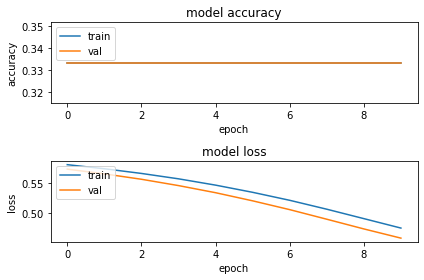

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1)  
   
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'val'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'val'], loc='upper left')

plt.tight_layout()
plt.show()  

These graphical reports (after using `verbose=0`) will be very useful for completing this assignment. Use the code above as a template for constructing your graphs. Limited changes should be needed to complete this assignment.

However, let's see how our network performs now on the entire data set. (This is not the best way to assess performance: we should use a **testing data set** with examples that the network has never seen **and** that we have never used to tune our hyperparameters. So, the evaluation below is a **biased** performance evaluation. However, these are small data sets so there isn't much data available for doing this kind of analysis currently: *we will use proper techniques in future assignments*.) Now that we have trained the network, we can use the `evaluate()` method to determine this information:

In [37]:
score = model.evaluate(X, Y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

5/5 [==============================] - 0s 1ms/step - loss: 0.4617 - accuracy: 0.3333
Test loss: 0.4617256820201874
Test accuracy: 0.3333333432674408


In the end, we are only getting 33% of the _validation_ examples classified correctly! However, we can use one (or more) of the three suggested tricks above for improving the performance of the network. Unless you rebuild the model again from scratch, training can be carried over from previous `fit()` operations. So, **if** we ran `fit()` *again* now for another 10 epochs, it would be **20 epochs total of training**. However, the history information from the previous 10 epochs may be lost, so be sure to keep records of the training process or restart from scratch if you want to train for more epochs from the very beginning

Some models _also_ take a long time to evaluate, so the `verbose()` option is available to help determine how long this process takes to complete, but feel free to turn it off by setting it to zero.

**If you want to get a fresh model** with new initial weights and no experience with the problem (sometimes needed due to optimization errors or bad hyperparameter choices in your models), then you will need to rerun all model construction/compilation steps: start back at `model = keras.Sequential()`. This will ensure that you get a freshly constructed model for subsequent training/validation and ensure that any hyperparameter changes have taken full effect.

## Practice!

Now that you have experienced the *process* for creating a single-layer network, try adjusting the suggested parameters above to learn how to build a single-layer neural network to classify the Iris data set!